## Visualizing Raw EEG using MNE

In this section we will see how to plot various attributes of a raw EEG data file using functions and methods provided by the MNE library. THis includes viewing data over time, over the scalp, and also plotting electrode locations on the scalp. We will use the same data file that we used in the previous section.


In [4]:
import mne
mne.set_log_level('error')
import numpy as np
import matplotlib.pyplot as plt

raw = mne.io.read_raw_brainvision('data/sub-001/sub-001.vhdr',
                            preload=True)

## Descriptive statistics on channels

We saw preivously how to get metadata from the `raw` file using the `.info` property. Another useful way of peeking into a raw file's data is to use the `.describe()` method to see the names of each channel, and the range of values in each channel. 

In [5]:
raw.describe()

<RawBrainVision | sub-001.eeg, 16 x 408640 (817.3 s), ~49.9 MB, data loaded>
ch  name  type  unit        min         Q1     median         Q3        max
 0  Fp1   EEG   µV      -285.40     -30.22      -1.43      27.83    1301.03
 1  F3    EEG   µV      -174.79     -17.23       9.22      27.46     253.16
 2  F7    EEG   µV      -218.86     -27.54       1.24      27.61     840.83
 3  C3    EEG   µV      -143.89     -11.69       2.93      14.49     125.35
 4  P3    EEG   µV      -222.93     -16.64       1.79      19.13      98.77
 5  TP9   EEG   µV      -521.95     -24.35      10.94      48.68     507.04
 6  Fz    EEG   µV       -63.42     -10.49      -0.49      12.11      96.25
 7  Cz    EEG   µV      -122.98     -16.84      -0.59      16.92      70.10
 8  Fp2   EEG   µV      -308.07     -34.05       0.94      32.26     455.79
 9  F4    EEG   µV       -88.54     -11.64       3.62      14.80     123.72
10  F8    EEG   µV      -390.29     -19.68      -0.60      14.91     241.88
11  C4    E

## Set Montage

The raw file contains the 10-20 system labels for each channel, but it doesn't provide information about the location of each electrode on the scalp. Internally, MNE can represent the location of each channel in a 3D Cartesian coordinate system. This is necessary to plot the locations of the channels on the scalp, which is extremely useful when visualizing EEG data. The set of coordinates for each channel is called the `montage` of the raw file. We can set the montage of the raw file to the 10-20 system using the `set_montage()` method. This will add the location information to the raw file. MNE provies a large set of standard montages for many commercial EEG systems. For the present data, the EEG caps were manufactured by a company named Easycap, and so we load the montage for the Easycap system.

In [6]:
raw.set_montage('easycap-M1')

Measurement date,"January 20, 2015 13:15:58 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,19 points
Good channels,16 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.01 Hz
Lowpass,80.00 Hz


The coordinates for each location are stored in the `'dig'` attribute of the `info` object. The `dig` attribute is a list of objects of the MNE type `mne.io._digitization.DigPoint`. Each electrode location is stored as a set of (*x*, *y*, *z*) Cartesian coordinates, i.e., positions in a 3D grid, where *x* is the left-right dimension, *y* is posterior-anterior, and *z* is inferior-posterior. The (0, 0, 0) location is inside the head, located in a plane defined by the bridge of the nose (called the **nasion**) and the left and right ear canals. As shown in the figure below, *x* goes from left (negative) to right (positive), *y* goes from posterior to anterior, and *z* goes from inferior to superior. In general, you won't need to work with this coordinate system directly, but it's useful to know how the data are represented.

In [8]:
raw.info['dig']

[<DigPoint |        LPA : (-86.1, -0.0, 0.0) mm     : head frame>,
 <DigPoint |     Nasion : (0.0, 86.1, 0.0) mm       : head frame>,
 <DigPoint |        RPA : (86.1, 0.0, 0.0) mm       : head frame>,
 <DigPoint |     EEG #1 : (-29.3, 90.3, 36.8) mm    : head frame>,
 <DigPoint |     EEG #2 : (29.3, 90.3, 36.8) mm     : head frame>,
 <DigPoint |     EEG #3 : (-51.8, 63.9, 87.6) mm    : head frame>,
 <DigPoint |     EEG #4 : (51.8, 63.9, 87.6) mm     : head frame>,
 <DigPoint |     EEG #5 : (-68.3, -0.0, 106.1) mm   : head frame>,
 <DigPoint |     EEG #6 : (68.3, 0.0, 106.1) mm     : head frame>,
 <DigPoint |     EEG #7 : (-51.8, -63.9, 87.6) mm   : head frame>,
 <DigPoint |     EEG #8 : (51.8, -63.9, 87.6) mm    : head frame>,
 <DigPoint |    EEG #11 : (-76.8, 55.8, 36.8) mm    : head frame>,
 <DigPoint |    EEG #12 : (76.8, 55.8, 36.8) mm     : head frame>,
 <DigPoint |    EEG #17 : (0.0, 68.3, 106.1) mm     : head frame>,
 <DigPoint |    EEG #18 : (0.0, 0.0, 135.1) mm      : head fra

Note above that the list of sensor locations does not contain the names of each sensor — the channel names we saw above. In general MNE's data structures are designed to assume that channels are listed in the same order in all attributes of the data structure. So, the order of labels in the list of channel names from `raw.info['ch_names']` corresponds to the order of the channel locations in `raw.info['dig']`. 

In [9]:
raw.info['ch_names']

['Fp1',
 'F3',
 'F7',
 'C3',
 'P3',
 'TP9',
 'Fz',
 'Cz',
 'Fp2',
 'F4',
 'F8',
 'C4',
 'P4',
 'TP10',
 'Pz',
 'Oz']

### View electrode positions

MNE provides tools for viewing channel locations in both 2D and 3D. 

:::{tip}

Always remember to use `plt.show()`, or put a semicolon after an MNE plot command. Otherwise the plot will be drawn twice. 
:::

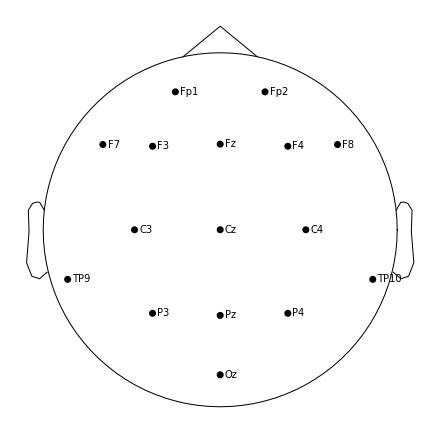

In [12]:
raw.plot_sensors(show_names=True)
plt.show()

### Interactive Plot of Continuous EEG

We could add more code to the above cell to do things like label the axes, add a title to indicate what electrode the data came from, make the *x* axis actually represent units of time, etc.. However, the great value of using MNE is that the developers have created customized functions for doing most everything you could ever want with EEG, with a lot less typing that if you were working with raw NumPy arrays and Matplotlib. 

For example, MNE data classes like `Raw` have a `.plot` method that allows you to generate a nice-looking plot that automatically does all the hard work of formatting it appropriately. This function actually creates an interactive plot in a new window (which is why you won't see output in this notebook file), which allows you to scroll through the entire continuous dataset (unfortunately this doesn't work if you're running Jupyter notebooks via a cloud service, but should work fine if you followed the instructions at the start of this course and are using VS Code).

```{python}
# plot 1 s of data, starting 15 s from the beginning of the recording
raw.plot(start=15, duration=1)
```

![](images/raw_mne_data.png)

The black area at the bottom shows the entire raw EEG recording, with a green vertical bar near the start indicating the position in the file that is currently plotted, and a drag bar to scroll through the data. The other colored vertical lines mark the times of event codes sent by the stimulus presentation program, which mark events of experimental interest.

## Event codes (Markers / Triggers)

Event codes — often called *markers* or *triggers* are codes that are sent by the stimulus presentation program to mark the times of events of experimental interest. The event codes are stored in the `.vmrk` file in Brain Vision format. When we import the raw data into MNE, these are stored in an attribute called `._annotations`. Although we can access that directly (e.g., `raw._annotations`), again MNE provides tools that makes this easier and generate more interpretable output: the `events_from_annotations()` function:

In [13]:
mne.events_from_annotations(raw)

(array([[     0,      0,  99999],
        [     0,      0,  10001],
        [ 25550,      0,      5],
        ...,
        [397701,      0,      3],
        [402068,      0,      7],
        [402073,      0,      4]]),
 {'Comment/actiCAP Data On': 10001,
  'New Segment/': 99999,
  'Stimulus/S  1': 1,
  'Stimulus/S  2': 2,
  'Stimulus/S  3': 3,
  'Stimulus/S  4': 4,
  'Stimulus/S  5': 5,
  'Stimulus/S  7': 7,
  'Stimulus/S101': 101,
  'Stimulus/S102': 102,
  'Stimulus/S111': 111,
  'Stimulus/S112': 112,
  'Stimulus/S201': 201,
  'Stimulus/S202': 202,
  'Stimulus/S211': 211,
  'Stimulus/S212': 212})

The result includes two outputs. The first is a NumPy array that has three columns, with one row for each event code in the data. The first column indicates the time of the event, and the last column stores the code associated with that event. These event codes are always represented as integers (since it is a NumPy array of integers). 

The second output is a dictionary mapping labels for each event code, to the numerical codes themselves. Usually these are not very informative in the raw data. In a later lesson, we will learn how to map the numerical codes to meaningful labels based on the experimental design. For now, it's simply important to understand how the event codes are stored in the `Raw` data object.

One important thing to know is that the event codes are stored in the same units as the data, so in this case, the event codes are in units of samples, not milliseconds. MNE knows this and operates accordingly, but if you want to know the time of an event in milliseconds, you need to convert it yourself based on the sampling rate. In this case, our sampling rate is 500 Hz, if we wanted to see the event timings in milliseconds we can divide the event time by the sampling rate, and multiplying by 1000. We can do this below by first assigning the two outputs of `mne.events_from_annotations()` to two variables, and then converting the values in the first column of the events `array`` to milliseconds:

In [14]:
events, event_dict = mne.events_from_annotations(raw)
events_ms = events.copy()
events_ms[:, 0] = events_ms[:, 0] / 500 * 1000
events_ms[:10]

array([[    0,     0, 99999],
       [    0,     0, 10001],
       [51100,     0,     5],
       [51106,     0,     1],
       [52198,     0,   201],
       [52288,     0,     2],
       [59164,     0,     3],
       [66566,     0,     1],
       [67562,     0,   211],
       [69864,     0,     3]])

Again, it's generally better to work with MNE objects using MNE's own functions and methods, but sometimes it's important to understand the `events` array. For example, there may be circumstances when you need to modify event codes. For example, we might want to separately average trials on which participants made correct and incorrect responses. In that case, we would need to change the event codes for stimuli followed by incorrect responses to something different than the event codes for correct responses.

In [28]:
raw.describe()

<RawBrainVision | sub-001.eeg, 16 x 408640 (817.3 s), ~49.9 MB, data loaded>
ch  name  type  unit        min         Q1     median         Q3        max
 0  Fp1   EEG   µV      -285.40     -30.22      -1.43      27.83    1301.03
 1  F3    EEG   µV      -174.79     -17.23       9.22      27.46     253.16
 2  F7    EEG   µV      -218.86     -27.54       1.24      27.61     840.83
 3  C3    EEG   µV      -143.89     -11.69       2.93      14.49     125.35
 4  P3    EEG   µV      -222.93     -16.64       1.79      19.13      98.77
 5  TP9   EEG   µV      -521.95     -24.35      10.94      48.68     507.04
 6  Fz    EEG   µV       -63.42     -10.49      -0.49      12.11      96.25
 7  Cz    EEG   µV      -122.98     -16.84      -0.59      16.92      70.10
 8  Fp2   EEG   µV      -308.07     -34.05       0.94      32.26     455.79
 9  F4    EEG   µV       -88.54     -11.64       3.62      14.80     123.72
10  F8    EEG   µV      -390.29     -19.68      -0.60      14.91     241.88
11  C4    E

---

## Summary

MNE Provides a number of methods for `Raw` objects that allow us to access and visualize aspects of both the metadata — including channel locations — and the data itself. However, in practice these are useful things to be familiar with, and they can be used when you're working with data from a system or format that you're not familiar with to get a better idea of the structure of the data. But in routine usage, within the context of a specific experiment we can expect that all of the data have the same structure. In the next series of lessons we'll walk through the steps that are routinely applied to any EEG data set, in order to prepare it for ERP analysis.